# Mediciones tesis

Importo los datos crudos con la funcion "check_import". Chequeo sus longitudes y que todo este en orden para importar en forma de matrices. Las mediciones de tipo S1, S2, M2 tienen dimensiones:

X = [alturas(h), mediciones, long del vector, disparos de la xethru]
obs:
    disparo de la xetru [0] = vector distancia
    disparo de la xetru [1:] = disparos por medicion

Las mediciones de tipo Z2 y MZ2 en lugar de tener la variable altura en la primer posicion, tienen la variable tita que define el angulo de incidencia. la altura se puede recuperar con la misma funcion "transformada". 

En ambos casos, la funcion guarda el valor de la altura en un vector h ( a partir de un h.txt en el directorio y un tita.txten el segundo caso)

Los datos son pasados por una funcion "transformada" que promedia y transforma fourier la señal, quedandose con la F ya normalizada y cortada para solo las frecencias positivas que nos interezan alrededor de la portadora.

En este codigo tambien se generan y guardan los graficos de las señales en valor absoluto.

### Funciones que se van a utilizar:

Check-importing data
----------

**funcion:** Check_import(Path, target, portadora):

Funcion que chequea numero de mediciones y long. Importa datos
*Inputs:*
- Path = path donde estan las mediciones
- Portadora = Fc8 o Fc7
- target = (S1, S2, M2, X2) o (Z2, MZ2)

*Output:*
- [0]:h = alturas de las mediciones
- [1]:S = devuelve el vector segun lo que importo
-solo para Z2 o MZ2-
- [2]tita = angulo de incidencia (si es dif a 0)

----------
transformada
----------

**funcion:** transformada(señal, fc, Nfft, Ts)


In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# load pickle module
import pickle


import os

In [2]:
%run codigos/check_import.ipynb
%run codigos/transformada.ipynb
%run codigos/to_baseband.ipynb
%run codigos/FFT_ordenada.ipynb
%run codigos/to_dB.ipynb


In [3]:
#-----------------------------------
## Parámetros globales de la antena
#-----------------------------------

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 
corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

#------------------------------
#Elegir frecuencia portadora
#------------------------------
portadora = input('portadora? (Fc7 o Fc8)')

if portadora == 'Fc7':
    fc = 7.290e9 
    Fc = '7.29GHz'
elif portadora == 'Fc8':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')


# Mediciones por fecha

In [4]:
date = ['mediciones_05_27', 'mediciones_06_09', 'mediciones_07_15', 'mediciones_08_22']
name = ['mayo(chapa cortada)','junio(chapa azul)','julio(chapa conductora)','agosto(chapa azul)','agosto(azul+conductora)']
path = []
for i in range(len(date)):
    path.append(os.path.join(sys.path[0],date[i]))
# print(path)
# print(type(path[0]))


## mayo

In [5]:
print('-----')
print('S1-mayo')
print('-----')
h1_may, S1_may = check_import(path[0], 'S1', portadora)
print('-----')
print('S2-mayo')
print('-----')
h2_may, S2_may = check_import(path[0], 'S2', portadora)

#los d son todos iguales (1.8-3m)
d1 = S1_may[0,0,:,0]
d2 = S2_may[0,0,:,0]

if np.array_equal(d1,d2) == True:
    d = d1


-----
S1-mayo
-----
altura = 0.37
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.465
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.66
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.865
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
[285, 285, 285, 285]
long iguales por altura, importo datos!!
-----
S2-mayo
-----
altura = 0.365
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.47
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.665
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
altura = 0.865
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
[285, 285, 285, 285]
long iguales por altura, importo datos!!


Text(0.5, 1.0, 'S1 mediciones_05_27')

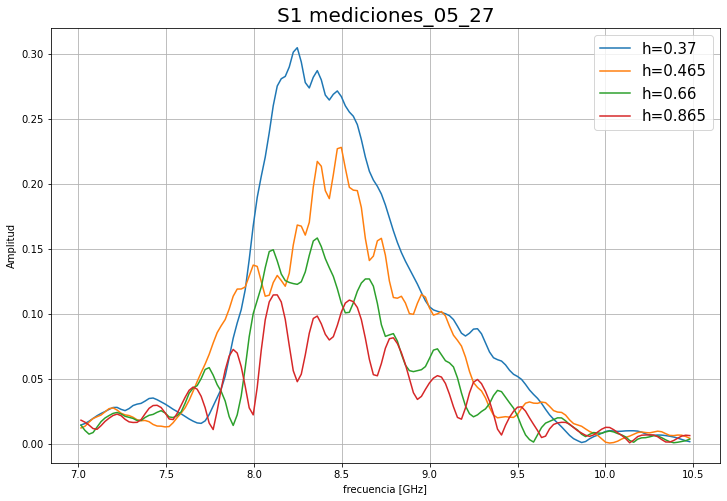

In [6]:
f1 = transformada(S1_may[0,:,:,:],fc,Nfft,Ts)[0]

S1_may_fft = np.zeros((len(h1_may),len(f1)),dtype=complex)
for j in range(len(h1_may)):
    S = S1_may[j,:,:,:]
    S1_may_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h1_may)):
    plt.plot(f1,np.abs(S1_may_fft[i,:]),label='h='+str(h1_may[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
#plt.ylim(-0.05,0.6)
plt.title('S1 '+date[0],fontsize=20)
#plt.savefig(os.path.join('graficos','S1_mayo.png'))


f iguales


Text(0.5, 1.0, 'S2 mediciones_05_27')

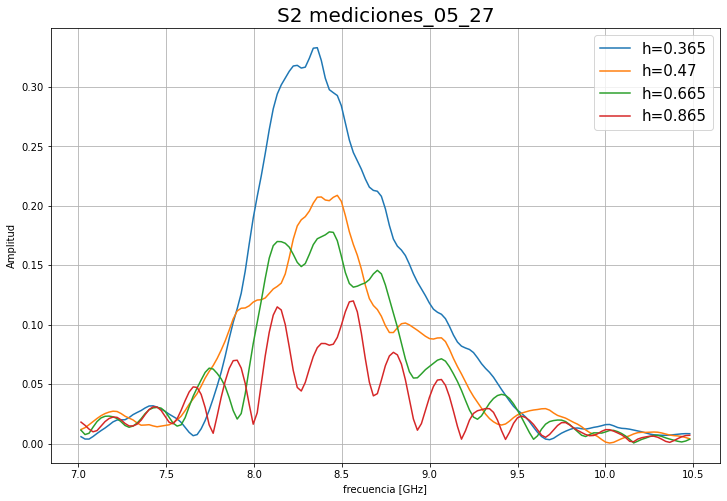

In [7]:
f2 = transformada(S1_may[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')

S2_may_fft = np.zeros((len(h2_may),len(f1)),dtype=complex)
for j in range(len(h2_may)):
    S = S2_may[j,:,:,:]
    S2_may_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h2_may)):
    plt.plot(f1,np.abs(S2_may_fft[i,:]),label='h='+str(h2_may[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S2 '+date[0],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_mayo.png'))

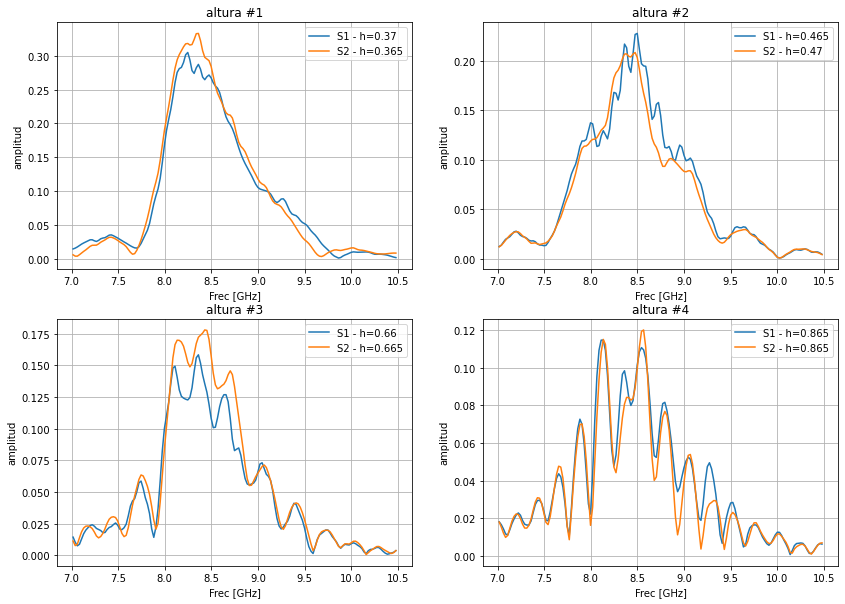

In [8]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
for i in range(2):
    for j in range(2):
        k= 2*i+j
        ax[i,j].plot(f1,np.abs(S1_may_fft[k,:]),label = 'S1 - h='+str(h1_may[k]))
        ax[i,j].plot(f1,np.abs(S2_may_fft[k,:]),label = 'S2 - h='+str(h2_may[k]))
        # ax[i,j].vlines(fc/1e9,-0.3,0.3,colors='blue',label = Fc)
        ax[i,j].grid()
        ax[i,j].set_xlabel('Frec [GHz]')
        ax[i,j].set_ylabel('amplitud')
        # ax[i,j].set_ylim(-0.05,0.6)
        ax[i,j].legend(loc="best")
        ax[i,j].set_title('altura #'+str(k+1))
plt.show()
# plt.savefig(os.path.join('graficos','S1_vs_S2_mayo.png'))

### Exporto datos
me armo un diccionario y lo pickleo

In [9]:
# # load pickle module
# import pickle

# if portadora == 'Fc8':
#     Mayo8 = {
#         'h1_may' : h2_may,
#         'h2_may' : h2_may,
#         'f_may' : f1,
#         'S1_may' : S1_may_fft,
#         'S2_may' : S2_may_fft,
#     }
#     # create a binary pickle file 
#     f = open("mayo_Fc8.pkl","wb") #Wb : write binary
#     pickle.dump(Mayo8,f) # write the python object (dict) to pickle file
#     f.close()

# else:
#     Mayo7 = {
#         'h1_may' : h2_may,
#         'h2_may' : h2_may,
#         'f_may' : f1,
#         'S1_may' : S1_may_fft,
#         'S2_may' : S2_may_fft,
#     }
#     # create a binary pickle file 
#     f = open("mayo_Fc7.pkl","wb") #Wb : write binary
#     pickle.dump(Mayo7,f) # write the python object (dict) to pickle file
#     f.close()

## Junio

In [10]:
print('-----')
print('S1-junio')
print('-----')
h1_jun, S1_jun = check_import(path[1], 'S1', portadora)
print('-----')
print('S2-junio')
print('-----')
h2_jun, S2_jun = check_import(path[1], 'S2', portadora)

#los d son todos iguales (1.8-3m)
d1 = S1_jun[0,0,:,0]
d2 = S2_jun[0,0,:,0]

if np.array_equal(d1,d2) == True:
    d = d1


-----
S1-junio
-----
altura = 0.35
# mediciones = 5
[285 285 285 285 285]
altura = 0.44
# mediciones = 5
[285 285 285 285 285]
altura = 0.65
# mediciones = 5
[285 285 285 285 285]
altura = 0.84
# mediciones = 5
[285 285 285 285 285]
[285, 285, 285, 285]
long iguales por altura, importo datos!!
-----
S2-junio
-----
altura = 0.35
# mediciones = 5
[285 285 285 285 285]
altura = 0.44
# mediciones = 5
[285 285 285 285 285]
altura = 0.65
# mediciones = 5
[285 285 285 285 285]
altura = 0.84
# mediciones = 5
[285 285 285 285 285]
[285, 285, 285, 285]
long iguales por altura, importo datos!!


Text(0.5, 1.0, 'S1 mediciones_06_09')

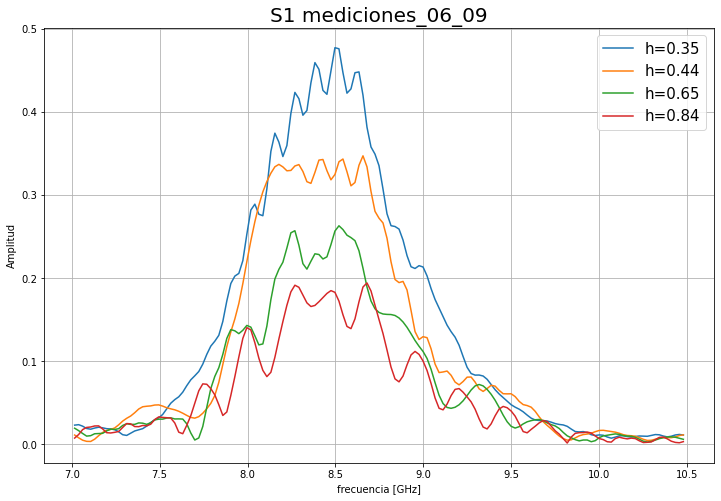

In [11]:
f1 = transformada(S1_jun[0,:,:,:],fc,Nfft,Ts)[0]

S1_jun_fft = np.zeros((len(h1_jun),len(f1)),dtype=complex)
for j in range(len(h1_jun)):
    S = S1_jun[j,:,:,:]
    S1_jun_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h1_jun)):
    plt.plot(f1,np.abs(S1_jun_fft[i,:]),label='h='+str(h1_jun[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S1 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','S1_junio.png'))


f iguales


Text(0.5, 1.0, 'S2 mediciones_06_09')

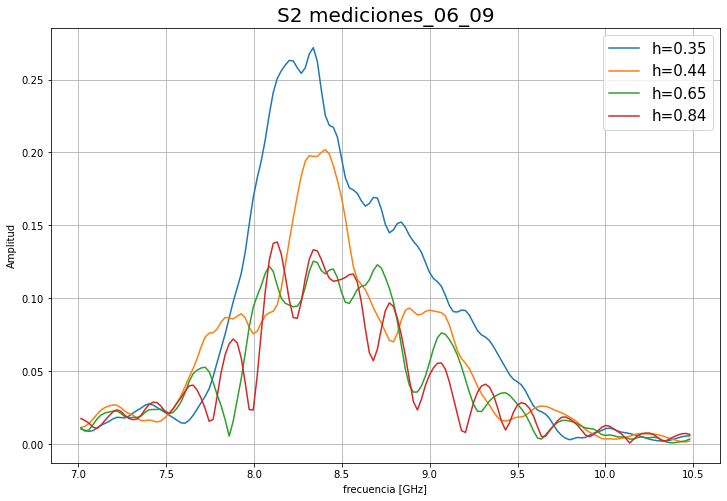

In [12]:
f2 = transformada(S1_jun[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')


S2_jun_fft = np.zeros((len(h2_jun),len(f2)),dtype=complex)
for j in range(len(h2_jun)):
    S = S2_jun[j,:,:,:]
    S2_jun_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
plt.figure(figsize=(12,8))
for i in range(len(h2_jun)):
    plt.plot(f2,np.abs(S2_jun_fft[i,:]),label='h='+str(h2_jun[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S2 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_junio.png'))

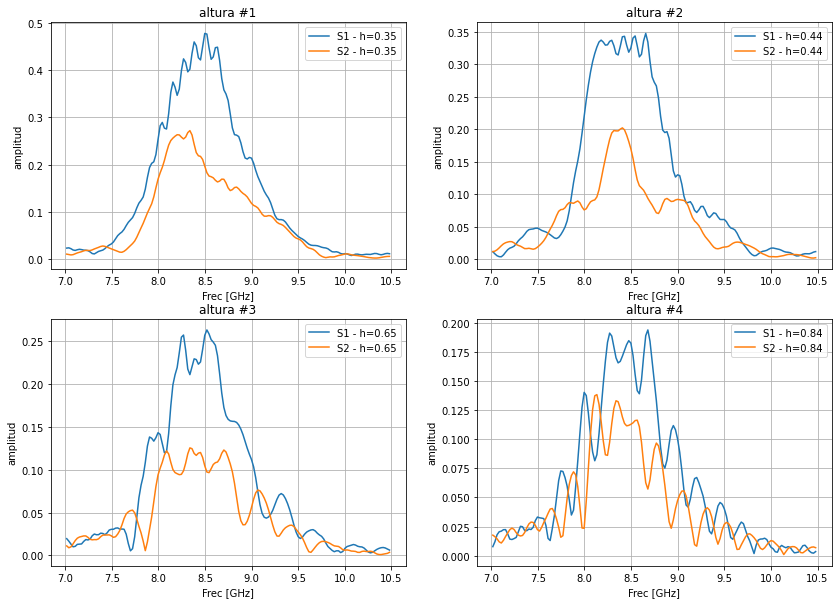

In [13]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
for i in range(2):
    for j in range(2):
        k= 2*i+j
        ax[i,j].plot(f1,np.abs(S1_jun_fft[k,:]),label = 'S1 - h='+str(h1_jun[k]))
        ax[i,j].plot(f1,np.abs(S2_jun_fft[k,:]),label = 'S2 - h='+str(h2_jun[k]))
        # ax[i,j].vlines(fc/1e9,-0.3,0.3,colors='blue',label = Fc)
        ax[i,j].grid()
        ax[i,j].set_xlabel('Frec [GHz]')
        ax[i,j].set_ylabel('amplitud')
        # ax[i].set_ylim(-0.05,0.6)
        ax[i,j].legend(loc="best")
        ax[i,j].set_title('altura #'+str(k+1))

plt.show()
# plt.savefig(os.path.join('graficos','S1_vs_S2_junio.png'))

In [14]:
print('-----')
print('Z2-junio')
print('-----')
hz_jun, Z2_jun, tita_jun = check_import(path[1], 'Z2', portadora)
print(hz_jun)
print(tita_jun)
print(Z2_jun)

-----
Z2-junio
-----
[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

0.42
[ 5. 10. 15. 20. 25. 30. 40. 50.]
[[[[ 1.80000007e-01 -6.76947832e-03 -6.77525997e-03 ... -6.77710772e-03
    -6.75326586e-03 -6.75469637e-03]
   [ 1.86452769e-01  2.87246704e-03  2.88927555e-03 ...  2.88206339e-03
     2.83914804e-03  2.88718939e-03]
   [ 1.92905531e-01  3.47375870e-03  3.46004963e-03 ...  3.47760320e-03
     3.50588560e-03  3.48001719e-03]
   ...
   [ 1.99322613e+00  2.75969505e-05  3.04877758e-05 ...  4.41670418e-05
     2.10404396e-05  2.54809856e-05]
   [ 1.99967889e+00  1.26600266e-04  1.27911568e-04 ...  1.35391951e-04
     1.26957893e-04  1.19417906e-04]
   [ 2.00613165e+00 -3.36170197e-05 -4.25577164e-05 ... -4.55081463e

son iguales


Text(0.5, 1.0, 'Z2 mediciones_06_09')

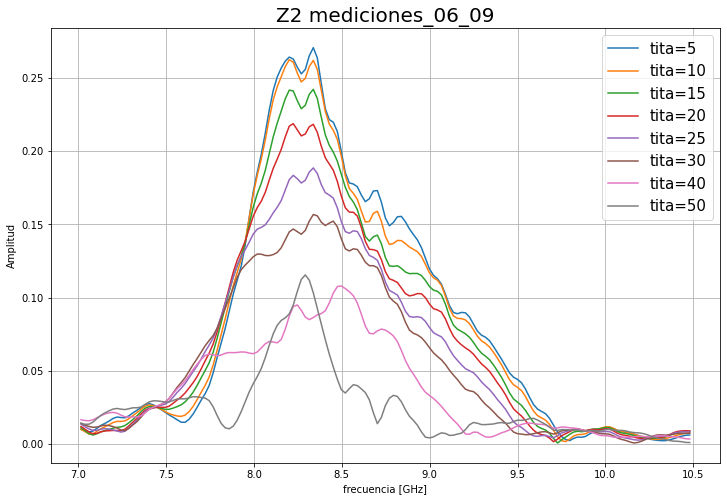

In [15]:
fz = transformada(Z2_jun[0,:,:,:],fc,Nfft,Ts)[0]

if np.array_equal(f2,fz) == True:
    print('son iguales')

#-------------------------MAYO----------------------------
Z2_jun_fft = np.zeros((len(tita_jun),len(fz)),dtype=complex)
for j in range(len(tita_jun)):
    Z = Z2_jun[j,:,:,:]
    Z2_jun_fft[j,:] = transformada(Z,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(tita_jun)):
    plt.plot(fz,np.abs(Z2_jun_fft[i,:]),label='tita='+str(round(tita_jun[i])))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('Z2 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','Z2_junio.png'))


In [16]:
# # load pickle module
# import pickle

# if portadora == 'Fc8':
#     Junio8 = {
#         'h1_jun' : h2_jun,
#         'h2_jun' : h2_jun,
#         'f_jun' : fz,
#         'S1_jun' : S1_jun_fft,
#         'S2_jun' : S2_jun_fft,
#         'hz_jun' : hz_jun,
#         'Z2_jun' : Z2_jun_fft,
#         'tita_jun' : tita_jun
#     }
#     # create a binary pickle file 
#     f = open("junio_Fc8.pkl","wb") #Wb : write binary
#     pickle.dump(Junio8,f) # write the python object (dict) to pickle file
#     f.close()

# else:
#     Junio7 = {
#         'h1_jun' : h2_jun,
#         'h2_jun' : h2_jun,
#         'f_jun' : fz,
#         'S1_jun' : S1_jun_fft,
#         'S2_jun' : S2_jun_fft,
#         'hz_jun' : hz_jun,
#         'Z2_jun' : Z2_jun_fft,
#         'tita_jun' : tita_jun
#     }
#     # create a binary pickle file 
#     f = open("junio_Fc7.pkl","wb") #Wb : write binary
#     pickle.dump(Junio7,f) # write the python object (dict) to pickle file
#     f.close()


## Julio


In [17]:
print('-----')
print('S1-julio')
print('-----')
h1_jul, S1_jul = check_import(path[2], 'S1', portadora)
print('-----')
print('S2-julio')
print('-----')
h2_jul, S2_jul = check_import(path[2], 'S2', portadora)

#los d son todos iguales (1.8-3m)
d1 = S1_jul[0,0,:,0]
d2 = S2_jul[0,0,:,0]

if np.array_equal(d1,d2) == True:
    d = d1


-----
S1-julio
-----
altura = 0.353
# mediciones = 5
[440 440 440 440 440]
altura = 0.467
# mediciones = 5
[441 441 441 441 441]
altura = 0.65
# mediciones = 5
[441 441 441 441 441]
[440, 441, 441]
corto la medición
-----
S2-julio
-----
altura = 0.353
# mediciones = 6
[441 441 441 441 441 441]
altura = 0.467
# mediciones = 5
[441 441 441 441 441]
altura = 0.65
# mediciones = 5
[441 441 441 441 441]
[441, 441, 441]
long iguales por altura, importo datos!!


Text(0.5, 1.0, 'S1 mediciones_07_15')

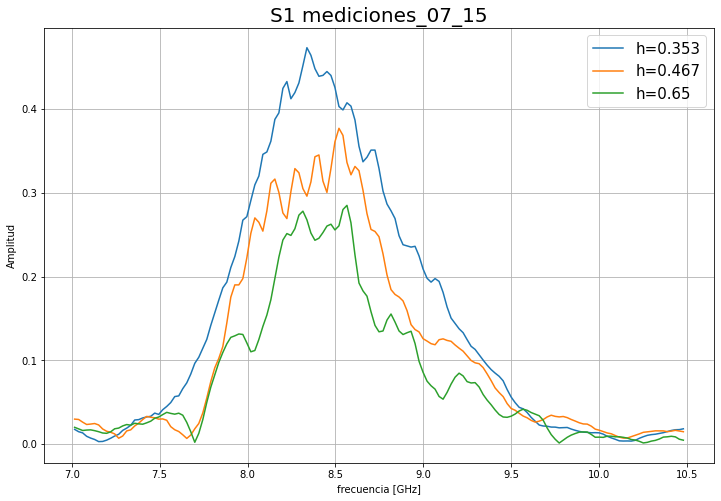

In [18]:
f1 = transformada(S1_jul[0,:,:,:],fc,Nfft,Ts)[0]

S1_jul_fft = np.zeros((len(h1_jul),len(f1)),dtype=complex)
for j in range(len(h1_jul)):
    S = S1_jul[j,:,:,:]
    S1_jul_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h1_jul)):
    plt.plot(f1,np.abs(S1_jul_fft[i,:]),label='h='+str(h1_jul[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S1 '+date[2],fontsize=20)
# plt.savefig(os.path.join('graficos','S1_julio.png'))


f iguales


Text(0.5, 1.0, 'S2 mediciones_07_15')

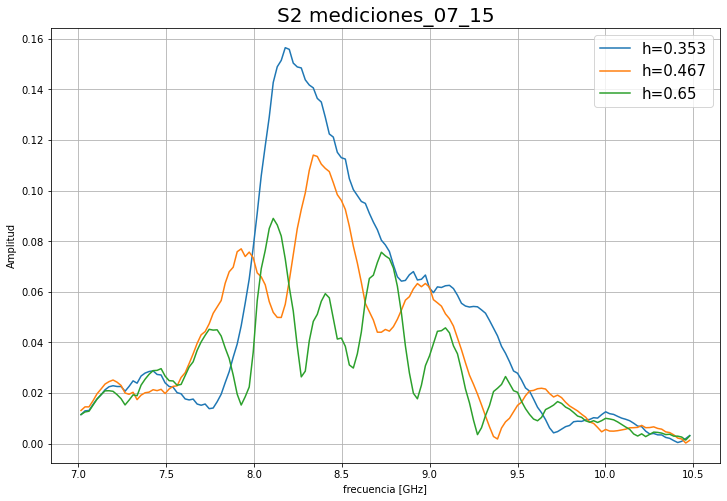

In [19]:
f2 = transformada(S1_jul[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')


S2_jul_fft = np.zeros((len(h2_jul),len(f2)),dtype=complex)
for j in range(len(h2_jul)):
    S = S2_jul[j,:,:,:]
    S2_jul_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
plt.figure(figsize=(12,8))
for i in range(len(h2_jul)):
    plt.plot(f2,np.abs(S2_jul_fft[i,:]),label='h='+str(h2_jul[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S2 '+date[2],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_julio.png'))

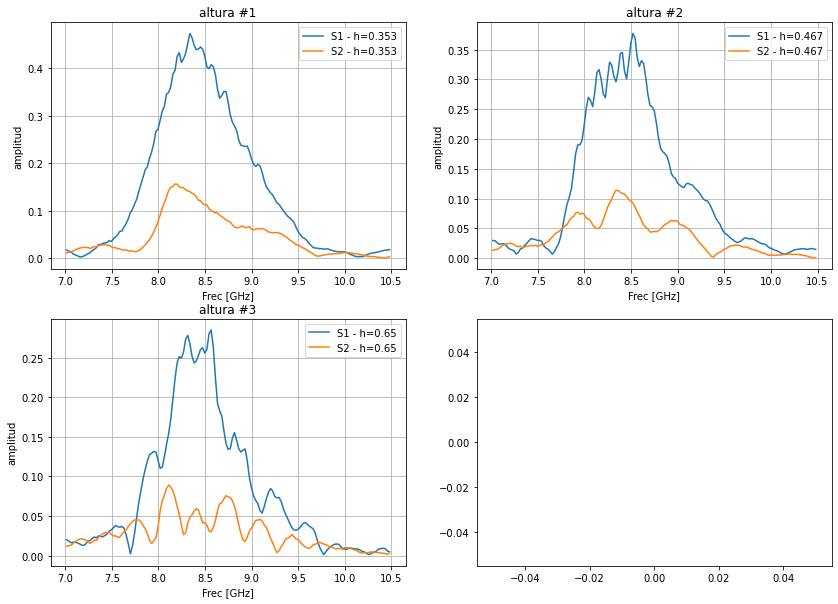

In [20]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

ax[0,0].plot(f1,np.abs(S1_jul_fft[0,:]),label = 'S1 - h='+str(h1_jul[0]))
ax[0,0].plot(f1,np.abs(S2_jul_fft[0,:]),label = 'S2 - h='+str(h2_jul[0]))
ax[0,0].grid()
ax[0,0].set_xlabel('Frec [GHz]')
ax[0,0].set_ylabel('amplitud')
ax[0,0].legend(loc="best")
ax[0,0].set_title('altura #'+str(0+1))

ax[0,1].plot(f1,np.abs(S1_jul_fft[1,:]),label = 'S1 - h='+str(h1_jul[1]))
ax[0,1].plot(f1,np.abs(S2_jul_fft[1,:]),label = 'S2 - h='+str(h2_jul[1]))
ax[0,1].grid()
ax[0,1].set_xlabel('Frec [GHz]')
ax[0,1].set_ylabel('amplitud')
ax[0,1].legend(loc="best")
ax[0,1].set_title('altura #'+str(1+1))

ax[1,0].plot(f1,np.abs(S1_jul_fft[2,:]),label = 'S1 - h='+str(h1_jul[2]))
ax[1,0].plot(f1,np.abs(S2_jul_fft[2,:]),label = 'S2 - h='+str(h2_jul[2]))
ax[1,0].grid()
ax[1,0].set_xlabel('Frec [GHz]')
ax[1,0].set_ylabel('amplitud')
ax[1,0].legend(loc="best")
ax[1,0].set_title('altura #'+str(2+1))

ax[1,1].plot()

plt.savefig(os.path.join('graficos','S1_vs_S2_julio.png'))

Text(0.5, 1.0, 'altura #3')

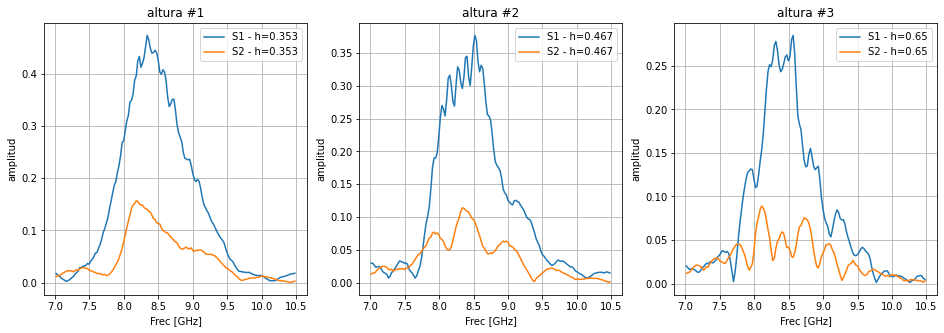

In [63]:
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

ax[0].plot(f1,np.abs(S1_jul_fft[0,:]),label = 'S1 - h='+str(h1_jul[0]))
ax[0].plot(f1,np.abs(S2_jul_fft[0,:]),label = 'S2 - h='+str(h2_jul[0]))
ax[0].grid()
ax[0].set_xlabel('Frec [GHz]')
ax[0].set_ylabel('amplitud')
ax[0].legend(loc="best")
ax[0].set_title('altura #'+str(0+1))

ax[1].plot(f1,np.abs(S1_jul_fft[1,:]),label = 'S1 - h='+str(h1_jul[1]))
ax[1].plot(f1,np.abs(S2_jul_fft[1,:]),label = 'S2 - h='+str(h2_jul[1]))
ax[1].grid()
ax[1].set_xlabel('Frec [GHz]')
ax[1].set_ylabel('amplitud')
ax[1].legend(loc="best")
ax[1].set_title('altura #'+str(1+1))

ax[2].plot(f1,np.abs(S1_jul_fft[2,:]),label = 'S1 - h='+str(h1_jul[2]))
ax[2].plot(f1,np.abs(S2_jul_fft[2,:]),label = 'S2 - h='+str(h2_jul[2]))
ax[2].grid()
ax[2].set_xlabel('Frec [GHz]')
ax[2].set_ylabel('amplitud')
ax[2].legend(loc="best")
ax[2].set_title('altura #'+str(2+1))

In [21]:
print('-----')
print('Z2-julio')
print('-----')
hz_jul, Z2_jul, tita_jul = check_import(path[2], 'Z2', portadora)
print(hz_jul)
print(tita_jul)
print(Z2_jul)

-----
Z2-julio
-----
[441 441 441]
iguales, importo datos!!

[441 441 441]
iguales, importo datos!!

[441 441 441]
iguales, importo datos!!

[441 441 441]
iguales, importo datos!!

0.353
[10. 20. 30. 40.]
[[[[ 1.80000007e-01 -7.33092427e-03 -7.36725330e-03 ... -7.33795762e-03
    -7.32496381e-03 -7.34257698e-03]
   [ 1.86444695e-01  3.89721990e-03  3.97899747e-03 ...  3.93110514e-03
     3.95151973e-03  3.86089087e-03]
   [ 1.92889383e-01  2.88915634e-03  2.83336639e-03 ...  2.87544727e-03
     2.82806158e-03  2.90098786e-03]
   ...
   [ 2.99632860e+00  6.46710396e-06  1.08182430e-05 ... -1.96695328e-06
     1.57356262e-05  3.24845314e-06]
   [ 3.00277329e+00  1.32411718e-04  1.33395195e-04 ...  1.25646591e-04
     1.47461891e-04  1.47819519e-04]
   [ 3.00921798e+00  1.20520592e-04  1.17689371e-04 ...  1.23023987e-04
     1.26987696e-04  1.09940767e-04]]

  [[ 1.80000007e-01 -7.37407804e-03 -7.32648373e-03 ... -7.30291009e-03
    -7.34862685e-03 -7.30431080e-03]
   [ 1.86444695e-01  3.

son iguales


Text(0.5, 1.0, 'Z2 mediciones_07_15')

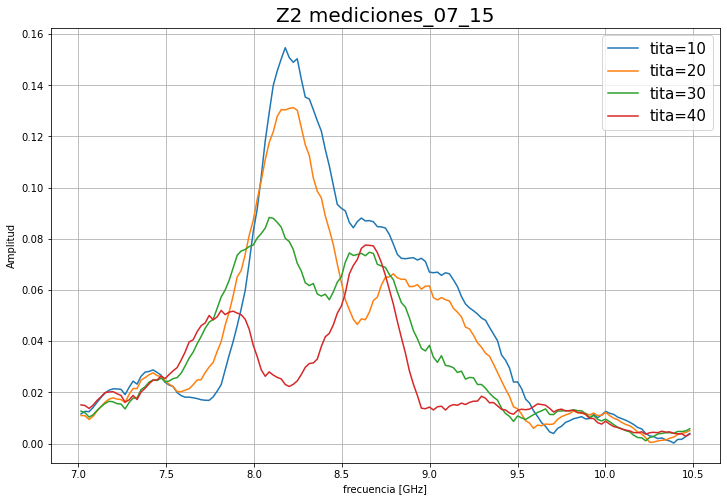

In [22]:
fz = transformada(Z2_jul[0,:,:,:],fc,Nfft,Ts)[0]

if np.array_equal(f2,fz) == True:
    print('son iguales')

Z2_jul_fft = np.zeros((len(tita_jul),len(fz)),dtype=complex)
for j in range(len(tita_jul)):
    Z = Z2_jul[j,:,:,:]
    Z2_jul_fft[j,:] = transformada(Z,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(tita_jul)):
    plt.plot(fz,np.abs(Z2_jul_fft[i,:]),label='tita='+str(round(tita_jul[i])))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('Z2 '+date[2],fontsize=20)
# plt.savefig(os.path.join('graficos','Z2_julio.png'))


In [23]:
# if portadora == 'Fc8':
#     Julio8 = {
#         'h1_jul' : h1_jul,
#         'h2_jul' : h2_jul,
#         'f_jul' : fz,
#         'S1_jul' : S1_jul_fft,
#         'S2_jul' : S2_jul_fft,
#         'hz_jul' : hz_jul,
#         'Z2_jul' : Z2_jul_fft,
#         'tita_jul' : tita_jul
#     }
#     # create a binary pickle file 
#     f = open("julio_Fc8.pkl","wb") #Wb : write binary
#     pickle.dump(Julio8,f) # write the python object (dict) to pickle file
#     f.close()

# else:
#     Julio7 = {
#         'h1_jul' : h2_jul,
#         'h2_jul' : h2_jul,
#         'f_jul' : fz,
#         'S1_jul' : S1_jul_fft,
#         'S2_jul' : S2_jul_fft,
#         'hz_jul' : hz_jul,
#         'Z2_jul' : Z2_jul_fft,
#         'tita_jul' : tita_jul
#     }
#     # create a binary pickle file 
#     f = open("julio_Fc7.pkl","wb") #Wb : write binary
#     pickle.dump(Julio7,f) # write the python object (dict) to pickle file
#     f.close()


## Agosto

In [24]:
print('-----')
print('S1-agosto')
print('-----')
h1A_ag, S1A_ag = check_import(path[3], 'S1A', portadora)
h1B_ag, S1B_ag = check_import(path[3], 'S1B', portadora)

print('-----')
print('S2-agosto')
print('-----')
h2_ag, S2_ag = check_import(path[3], 'S2', portadora)
hm2_ag, M2_ag = check_import(path[3],'M2', portadora)

if np.array_equal(h1A_ag,h1B_ag) == True:
    print('las alturas de h1 son iguales')
    h1_ag = h1A_ag
else:
    print('ojo que hay dos alturas diferentes para h1')

if np.array_equal(h2_ag,hm2_ag) == True:
    print('las alturas de h2 y hm2 son iguales')

else:
    print('ojo que hay dos alturas diferentes para h1')

if np.array_equal(h1_ag,h2_ag) == True:
    print('tengo todas las alturas de la medicion iguales, llamo h_ag')
    h_ag = h1_ag
else:
    print('tengo dos alturas diferentes para h1 y h2')

#los d son todos iguales (1.8-3m)
# d1 = S1A_ag[0,0,:,0]
# d2 = S2_ag[0,0,:,0]

# if np.array_equal(d1,d2) == True:
#     d = d1


-----
S1-agosto
-----
altura = 0.355
# mediciones = 5
[440 440 440 440 440]
altura = 0.435
# mediciones = 5
[440 440 440 440 440]
[440, 440]
long iguales por altura, importo datos!!
altura = 0.355
# mediciones = 5
[440 440 440 440 440]
altura = 0.435
# mediciones = 5
[440 440 440 440 440]
[440, 440]
long iguales por altura, importo datos!!
-----
S2-agosto
-----
altura = 0.355
# mediciones = 5
[440 440 440 440 440]
altura = 0.435
# mediciones = 5
[440 440 440 440 440]
[440, 440]
long iguales por altura, importo datos!!
altura = 0.355
# mediciones = 5
[440 440 440 440 440]
altura = 0.435
# mediciones = 5
[440 440 440 440 440]
[440, 440]
long iguales por altura, importo datos!!
las alturas de h1 son iguales
las alturas de h2 y hm2 son iguales
tengo todas las alturas de la medicion iguales, llamo h_ag


 las f1 son iguales


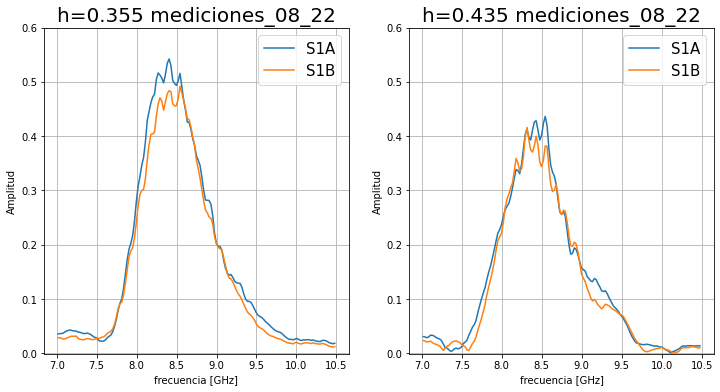

In [57]:
f1A = transformada(S1A_ag[0,:,:,:],fc,Nfft,Ts)[0]
f1B = transformada(S1B_ag[0,:,:,:],fc,Nfft,Ts)[0]

if np.array_equal(f1A,f1B) == True:
    print(' las f1 son iguales')
    f1 = f1A

S1A_ag_fft = np.zeros((len(h_ag),len(f1)),dtype=complex)
for j in range(len(h_ag)):
    SA = S1A_ag[j,:,:,:]
    S1A_ag_fft[j,:] = transformada(SA,fc,Nfft,Ts)[1]
    
S1B_ag_fft = np.zeros((len(h_ag),len(f1)),dtype=complex)
for j in range(len(h_ag)):
    SB = S1B_ag[j,:,:,:]
    S1B_ag_fft[j,:] = transformada(SB,fc,Nfft,Ts)[1]


fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i in range(len(h_ag)):
    ax[i].plot(f1,np.abs(S1A_ag_fft[i,:]),label='S1A')
    ax[i].plot(f1,np.abs(S1B_ag_fft[i,:]),label='S1B')
    ax[i].grid()    
    ax[i].legend(loc="best",fontsize=15)
    ax[i].set_xlabel('frecuencia [GHz]')
    ax[i].set_ylim(-0.001,0.6)
    ax[i].set_ylabel('Amplitud')
    # ax[i].set_ylim(-0.05,0.6)
    ax[i].set_title('h='+str(h_ag[i])+' '+date[3],fontsize=20)

plt.savefig(os.path.join('graficos','S1_Agosto.png'))

plt.show()


f iguales


Text(0.5, 1.0, 'S2 mediciones_08_22')

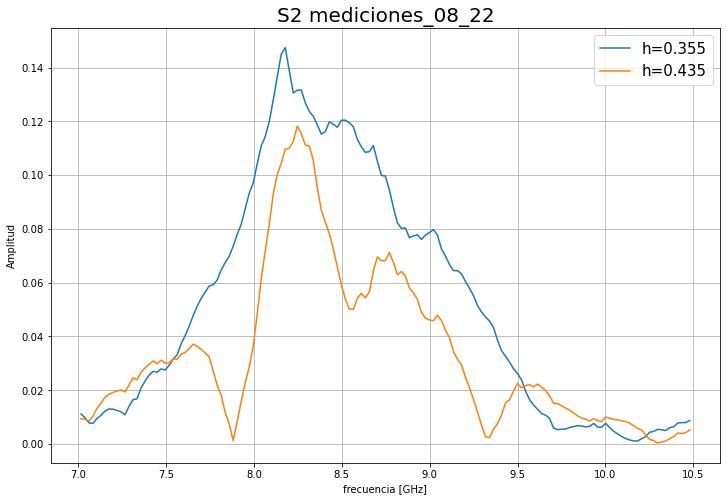

In [26]:
f2 = transformada(S2_ag[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')
    f_ag = f1


S2_ag_fft = np.zeros((len(h2_ag),len(f_ag)),dtype=complex)
for j in range(len(h2_ag)):
    S = S2_ag[j,:,:,:]
    S2_ag_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
plt.figure(figsize=(12,8))
for i in range(len(h2_ag)):
    plt.plot(f_ag,np.abs(S2_ag_fft[i,:]),label='h='+str(h2_ag[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('S2 '+date[3],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_agosto.png'))

f iguales


Text(0.5, 1.0, 'M2 mediciones_08_22')

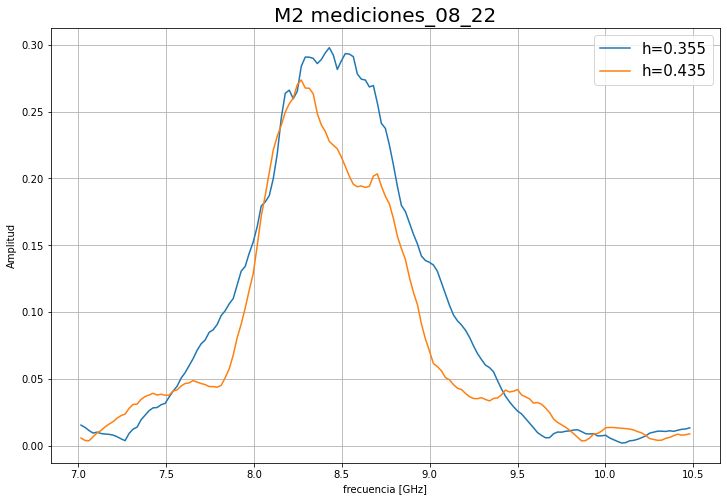

In [27]:
fm = transformada(M2_ag[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(fm,f_ag) == True:
    print('f iguales')


M2_ag_fft = np.zeros((len(h_ag),len(f_ag)),dtype=complex)
for j in range(len(h_ag)):
    S = M2_ag[j,:,:,:]
    M2_ag_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
plt.figure(figsize=(12,8))
for i in range(len(h_ag)):
    plt.plot(f_ag,np.abs(M2_ag_fft[i,:]),label='h='+str(h_ag[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
# plt.ylim(-0.05,0.6)
plt.title('M2 '+date[3],fontsize=20)
# plt.savefig(os.path.join('graficos','M2_agosto.png'))

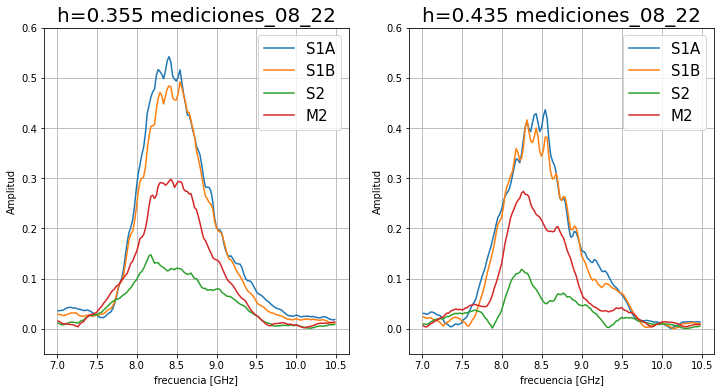

In [28]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i in range(len(h_ag)):
    ax[i].plot(f_ag,np.abs(S1A_ag_fft[i,:]),label='S1A')
    ax[i].plot(f_ag,np.abs(S1B_ag_fft[i,:]),label='S1B')
    ax[i].plot(f_ag,np.abs(S2_ag_fft[i,:]),label='S2')
    ax[i].plot(f_ag,np.abs(M2_ag_fft[i,:]),label='M2')
    ax[i].grid()    
    ax[i].legend(loc="best",fontsize=15)
    ax[i].set_xlabel('frecuencia [GHz]')
    ax[i].set_ylabel('Amplitud')
    ax[i].set_ylim(-0.05,0.6)
    ax[i].set_title('h='+str(h_ag[i])+' '+date[3],fontsize=20)

# plt.savefig(os.path.join('graficos','comp_agosto.png'))
plt.show()

In [29]:
print('-----')
print('Z2/ZM2-agosto')
print('-----')
hz_ag, Z2_ag, tita_ag = check_import(path[3], 'Z2', portadora)
MZ2_ag = check_import(path[3], 'MZ2', portadora)[1]


-----
Z2/ZM2-agosto
-----
[440 440 440]
iguales, importo datos!!

[440 440 440]
iguales, importo datos!!

[440 440 440]
iguales, importo datos!!

[440 440 440]
iguales, importo datos!!



son iguales


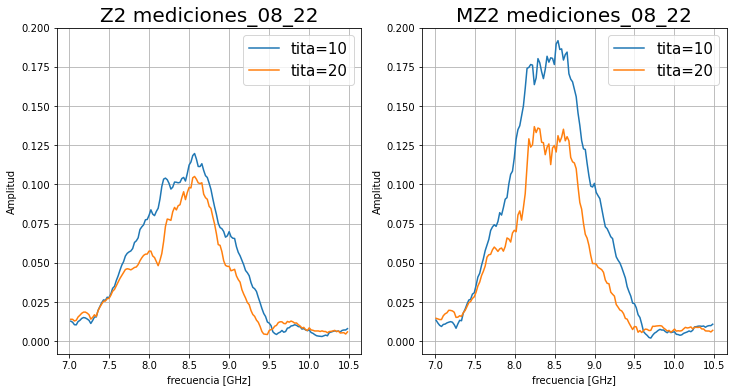

In [55]:
fz = transformada(Z2_ag[0,:,:,:],fc,Nfft,Ts)[0]

if np.array_equal(f_ag,fz) == True:
    print('son iguales')

Z2_ag_fft = np.zeros((len(tita_ag),len(fz)),dtype=complex)
for j in range(len(tita_ag)):
    Z = Z2_ag[j,:,:,:]
    Z2_ag_fft[j,:] = transformada(Z,fc,Nfft,Ts)[1]

MZ2_ag_fft = np.zeros((len(tita_ag),len(fz)),dtype=complex)
for j in range(len(tita_ag)):
    MZ = MZ2_ag[j,:,:,:]
    MZ2_ag_fft[j,:] = transformada(MZ,fc,Nfft,Ts)[1]

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i in range(len(tita_ag)):
    ax[0].plot(fz,np.abs(Z2_ag_fft[i,:]),label='tita='+str(round(tita_ag[i])))
    ax[1].plot(fz,np.abs(MZ2_ag_fft[i,:]),label='tita='+str(round(tita_ag[i])))
ax[0].grid()    
ax[0].legend(loc="best",fontsize=15)
ax[0].set_xlabel('frecuencia [GHz]')
ax[0].set_ylim(-0.008,0.2)
ax[0].set_ylabel('Amplitud')
ax[0].set_title('Z2 '+date[3],fontsize=20)

ax[1].grid()    
ax[1].legend(loc="best",fontsize=15)
ax[1].set_xlabel('frecuencia [GHz]')
ax[1].set_ylim(-0.008,0.2)
ax[1].set_ylabel('Amplitud')
ax[1].set_title('MZ2 '+date[3],fontsize=20)

plt.savefig(os.path.join('graficos','Z2_MZ2_agosto.png'))



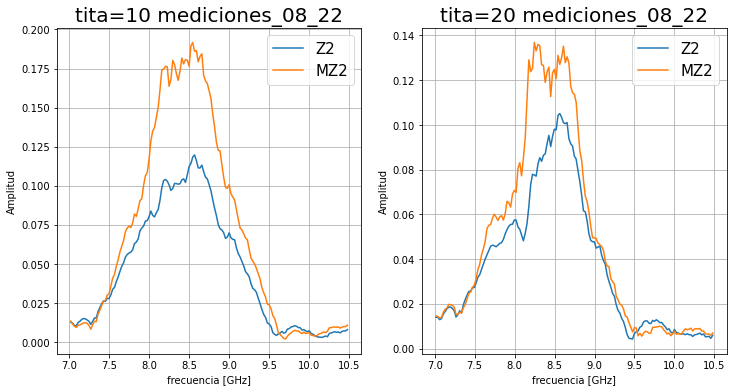

In [31]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i in range(len(tita_ag)):
    ax[i].plot(fz,np.abs(Z2_ag_fft[i,:]),label='Z2')
    ax[i].plot(fz,np.abs(MZ2_ag_fft[i,:]),label='MZ2')
    ax[i].grid()    
    ax[i].legend(loc="best",fontsize=15)
    ax[i].set_xlabel('frecuencia [GHz]')
    ax[i].set_ylabel('Amplitud')
    ax[i].set_title('tita='+str(round(tita_ag[i]))+' '+date[3],fontsize=20)

plt.show()
# plt.savefig(os.path.join('graficos','Z2_MZ2_agosto.png'))

In [32]:
# if portadora == 'Fc8':
#     Agosto8 = {
#         'h_ag' : h_ag,
#         'f_ag' : f_ag,
#         'S1A_ag' : S1A_ag_fft,
#         'S1B_ag' : S1B_ag_fft,
#         'S2_ag' : S2_ag_fft,
#         'M2_ag' : M2_ag_fft,
#         'hz_ag' : hz_ag,
#         'Z2_ag' : Z2_ag_fft,
#         'MZ2_ag' : MZ2_ag_fft,
#         'tita_ag' : tita_ag
#     }
#     # create a binary pickle file 
#     f = open("agosto_Fc8.pkl","wb") #Wb : write binary
#     pickle.dump(Agosto8,f) # write the python object (dict) to pickle file
#     f.close()

# else:
#     Agosto7 = {
#         'h_ag' : h_ag,
#         'f_ag' : f_ag,
#         'S1A_ag' : S1A_ag_fft,
#         'S1B_ag' : S1B_ag_fft,
#         'S2_ag' : S2_ag_fft,
#         'M2_ag' : M2_ag_fft,
#         'hz_ag' : hz_ag,
#         'Z2_ag' : Z2_ag_fft,
#         'MZ2_ag' : MZ2_ag_fft,
#         'tita_ag' : tita_ag
#     }
#     # create a binary pickle file 
#     f = open("agosto_Fc7.pkl","wb") #Wb : write binary
#     pickle.dump(Agosto7,f) # write the python object (dict) to pickle file
#     f.close()


## comparo todo

In [33]:
print(h1_may,np.shape(S1_may_fft))
print(h1_jun,np.shape(S1_jun_fft))
print(h1_jul,np.shape(S1_jul_fft))
print(h1_ag,np.shape(S1A_ag_fft),np.shape(S1B_ag_fft))

[0.37  0.465 0.66  0.865] (4, 153)
[0.35 0.44 0.65 0.84] (4, 153)
[0.353 0.467 0.65 ] (3, 153)
[0.355 0.435] (2, 153) (2, 153)


Text(0.5, 1.0, 'h(aprox) = 85cm')

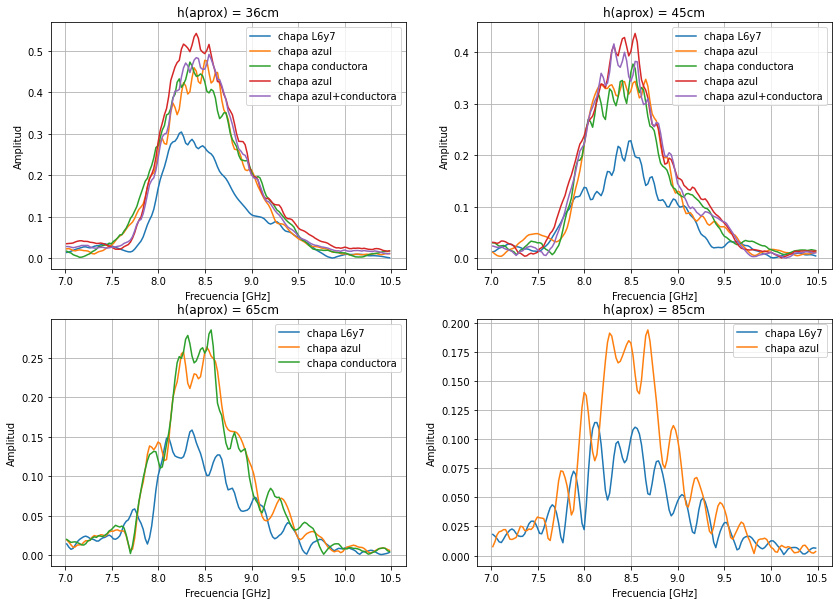

In [34]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
ax[0,0].plot(f1,np.abs(S1_may_fft[0,:]),label='chapa L6y7')
ax[0,0].plot(f1,np.abs(S1_jun_fft[0,:]),label='chapa azul')
ax[0,0].plot(f1,np.abs(S1_jul_fft[0,:]),label='chapa conductora')
ax[0,0].plot(f1,np.abs(S1A_ag_fft[0,:]),label='chapa azul')
ax[0,0].plot(f1,np.abs(S1B_ag_fft[0,:]),label='chapa azul+conductora')
ax[0,0].grid()
ax[0,0].set_xlabel('Frecuencia [GHz]')
ax[0,0].set_ylabel('Amplitud')
ax[0,0].legend(loc="best")
ax[0,0].set_title('h(aprox) = 36cm')

ax[0,1].plot(f1,np.abs(S1_may_fft[1,:]),label='chapa L6y7')
ax[0,1].plot(f1,np.abs(S1_jun_fft[1,:]),label='chapa azul')
ax[0,1].plot(f1,np.abs(S1_jul_fft[1,:]),label='chapa conductora')
ax[0,1].plot(f1,np.abs(S1A_ag_fft[1,:]),label='chapa azul')
ax[0,1].plot(f1,np.abs(S1B_ag_fft[1,:]),label='chapa azul+conductora')
ax[0,1].grid()
ax[0,1].set_xlabel('Frecuencia [GHz]')
ax[0,1].set_ylabel('Amplitud')
ax[0,1].legend(loc="best")
ax[0,1].set_title('h(aprox) = 45cm')

ax[1,0].plot(f1,np.abs(S1_may_fft[2,:]),label='chapa L6y7')
ax[1,0].plot(f1,np.abs(S1_jun_fft[2,:]),label='chapa azul')
ax[1,0].plot(f1,np.abs(S1_jul_fft[2,:]),label='chapa conductora')
ax[1,0].grid()
ax[1,0].set_xlabel('Frecuencia [GHz]')
ax[1,0].set_ylabel('Amplitud')
ax[1,0].legend(loc="best")
ax[1,0].set_title('h(aprox) = 65cm')

ax[1,1].plot(f1,np.abs(S1_may_fft[3,:]),label='chapa L6y7')
ax[1,1].plot(f1,np.abs(S1_jun_fft[3,:]),label='chapa azul')
ax[1,1].grid()
ax[1,1].set_xlabel('Frecuencia [GHz]')
ax[1,1].set_ylabel('Amplitud')
ax[1,1].legend(loc="best")
ax[1,1].set_title('h(aprox) = 85cm')
# plt.savefig(os.path.join('graficos','????????????.png'))
    

# decaimiento (Banda base (S1))
Analizamos el decaimiento de la señal en funcion de la distancia. 

Siendo:
\begin{cases}
    A_{max}&=Max(|Amplitud|)\\
    E&=\sum(|Pot^2|)\\
\end{cases}

El objetivo es ver si la señal sigue decayendo segun :
\begin{equation}
    E=\frac{A}{r^p}\rightarrow E_{dB}=\underbrace{10\log_{10}(A)}_{a_o}-\underbrace{10p\log_{10}(r)}_{X}
\end{equation}

donde vamos a ajustar los datos obteidos con una funcion lineal y esperamos que $p\sim 1$

In [35]:
from sklearn import linear_model

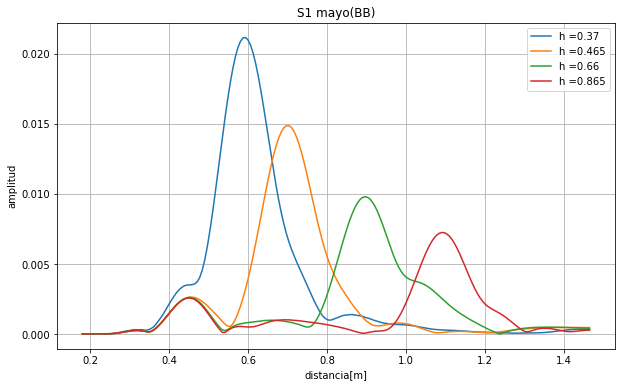

[  0.         -12.48798203]


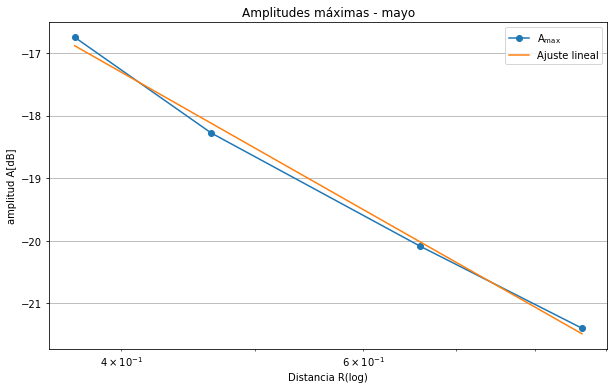

In [36]:
d_may = S1_may[0,0,:,0]
may_avg = np.mean(S1_may[:,0:,:,1:], axis=(1,3))
BB_may = np.zeros_like(may_avg, dtype=complex)
plt.figure(figsize=(10,6))

for h in range(len(h1_may)):
    BB_may[h,:] = to_baseband(may_avg[h,:],Ts,BW,fc)
    plt.plot(d_may[0:200],np.abs(BB_may[h,0:200]),label='h ='+str(h1_may[h]))

plt.grid()
plt.xlabel('distancia[m]')
plt.ylabel('amplitud')
plt.title('S1 mayo(BB)')
plt.legend(loc='best')
plt.show()
# plt.savefig(os.path.join('graficos','S1_BB_may.png'))

amax_may = np.max(np.abs(BB_may), axis=1)
lr = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h1_may),np.log10(h1_may))))
y = 10*np.log10(amax_may)
lr.fit(X[:,:],y[:])
w = lr.coef_
print(w)
ajuste = lr.predict(X)

plt.figure(figsize=(10,6))
plt.title('Amplitudes máximas - mayo')
plt.xlabel('Distancia R(log)')
plt.ylabel('amplitud A[dB]')
plt.semilogx(h1_may,10*np.log10(amax_may),'-o',label='$\mathregular{A_{max}}$')
plt.semilogx(h1_may,ajuste,label='Ajuste lineal')
plt.grid()
plt.legend(loc="best")
plt.show()
# plt.savefig(os.path.join('graficos','decaimiento_mayo.png'))


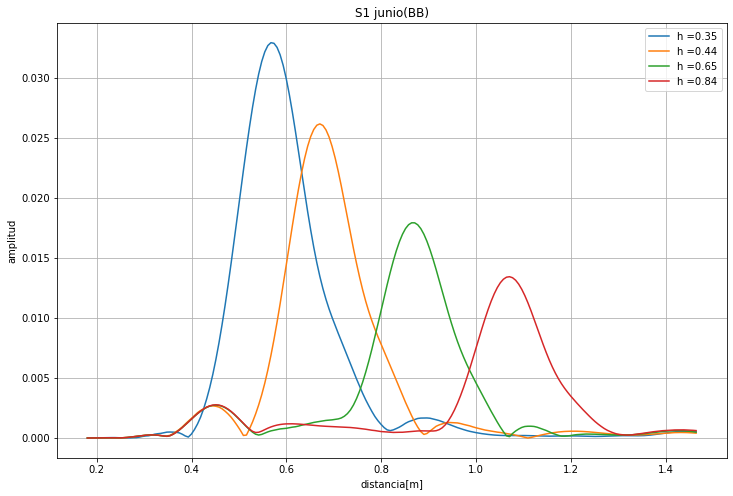

[  0.         -10.14805803]


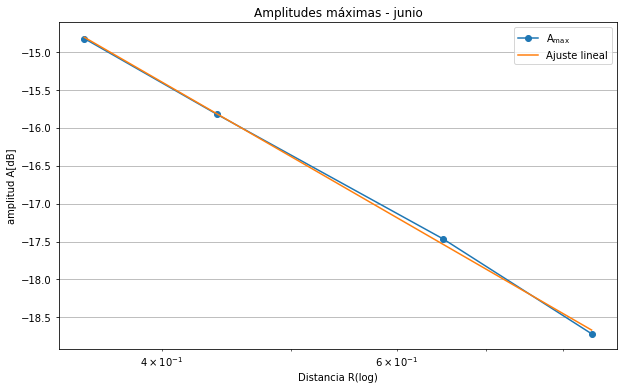

In [37]:
d_jun = S1_jun[0,0,:,0]
jun_avg = np.mean(S1_jun[:,0:,:,1:], axis=(1,3))
BB_jun = np.zeros_like(jun_avg, dtype=complex)
plt.figure(figsize=(12,8))

for h in range(len(h1_jun)):
    BB_jun[h,:] = to_baseband(jun_avg[h,:],Ts,BW,fc)
    plt.plot(d_jun[0:200],np.abs(BB_jun[h,0:200]),label='h ='+str(h1_jun[h]))

plt.grid()
plt.xlabel('distancia[m]')
plt.ylabel('amplitud')
plt.title('S1 junio(BB)')
plt.legend(loc='best')
plt.show()
# plt.savefig(os.path.join('graficos','S1_BB_jun.png'))

amax_jun = np.max(np.abs(BB_jun), axis=1)
lr = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h1_jun),np.log10(h1_jun))))
y = 10*np.log10(amax_jun)
lr.fit(X[:,:],y[:])
w = lr.coef_
print(w)
ajuste = lr.predict(X)

plt.figure(figsize=(10,6))
plt.title('Amplitudes máximas - junio')
plt.xlabel('Distancia R(log)')
plt.ylabel('amplitud A[dB]')
plt.semilogx(h1_jun,10*np.log10(amax_jun),'-o',label='$\mathregular{A_{max}}$')
plt.semilogx(h1_jun,ajuste,label='Ajuste lineal')
plt.grid()
plt.legend(loc="best")
plt.show()
# plt.savefig(os.path.join('graficos','decaimiento_junio.png'))

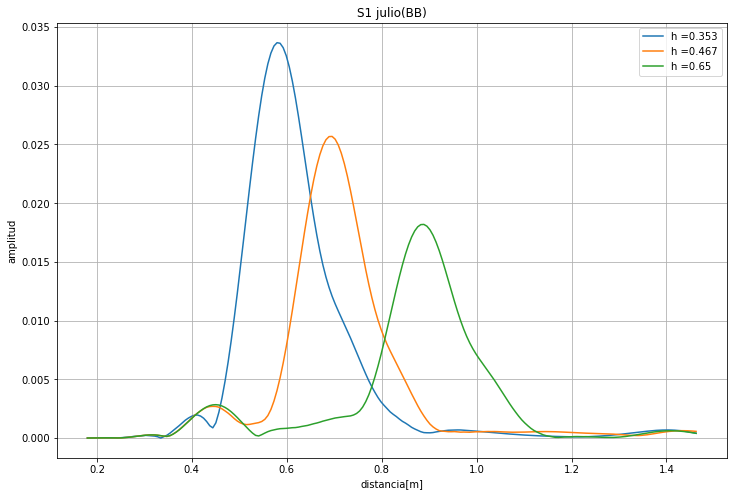

[  0.         -10.09038418]


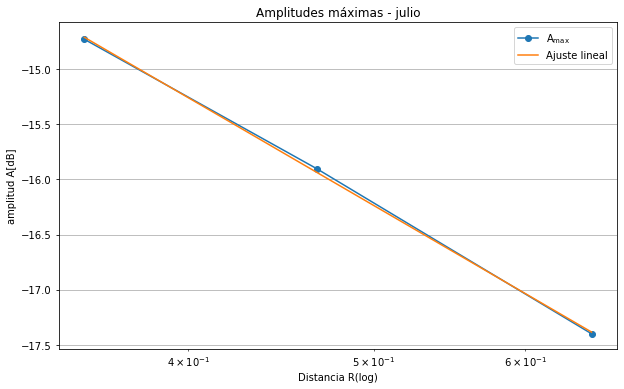

In [38]:
d_jul = S1_jul[0,0,:,0]
jul_avg = np.mean(S1_jul[:,0:,:,1:], axis=(1,3))
BB_jul = np.zeros_like(jul_avg, dtype=complex)
plt.figure(figsize=(12,8))

for h in range(len(h1_jul)):
    BB_jul[h,:] = to_baseband(jul_avg[h,:],Ts,BW,fc)
    plt.plot(d_jul[0:200],np.abs(BB_jul[h,0:200]),label='h ='+str(h1_jul[h]))

plt.grid()
plt.xlabel('distancia[m]')
plt.ylabel('amplitud')
plt.title('S1 julio(BB)')
plt.legend(loc='best')
plt.show()
# plt.savefig(os.path.join('graficos','S1_BB_jun.png'))

amax_jul = np.max(np.abs(BB_jul), axis=1)
lr = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h1_jul),np.log10(h1_jul))))
y = 10*np.log10(amax_jul)
lr.fit(X[:,:],y[:])
w = lr.coef_
print(w)
ajuste = lr.predict(X)


plt.title('Amplitudes máximas - julio')
plt.xlabel('Distancia R(log)')
plt.ylabel('amplitud A[dB]')
plt.semilogx(h1_jul,10*np.log10(amax_jul),'-o',label='$\mathregular{A_{max}}$')
plt.semilogx(h1_jul,ajuste,label='Ajuste lineal')
plt.grid()
plt.legend(loc="best")
plt.show()
# plt.savefig(os.path.join('graficos','decaimiento_julio.png'))

iguales--> llamo d_ag
[  0.         -12.68987467]
[  0.         -11.33837554]


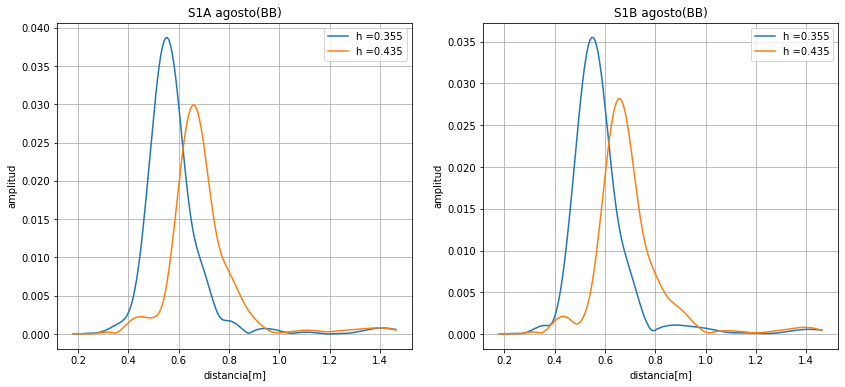

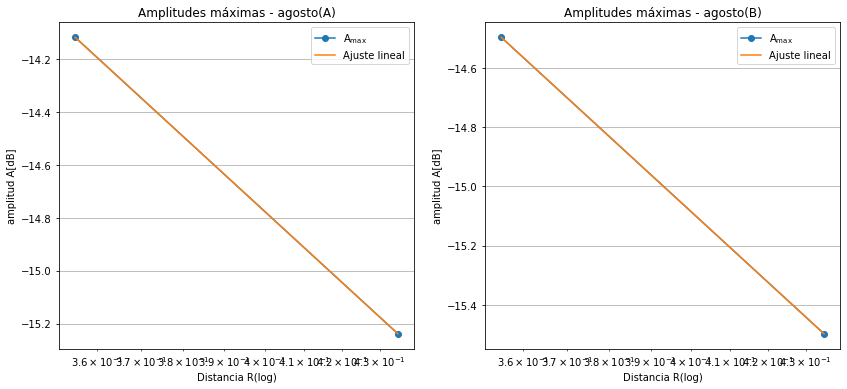

In [39]:
da_ag = S1A_ag[0,0,:,0]
db_ag = S1B_ag[0,0,:,0]
if np.array_equiv(da_ag,db_ag):
    print('iguales--> llamo d_ag')
    d_ag = da_ag
else:
    print('son dif')

agA_avg = np.mean(S1A_ag[:,0:,:,1:], axis=(1,3))
BBA_ag = np.zeros_like(agA_avg, dtype=complex)
agB_avg = np.mean(S1B_ag[:,0:,:,1:], axis=(1,3))
BBB_ag = np.zeros_like(agB_avg, dtype=complex)

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
for h in range(len(h1_ag)):
    BBA_ag[h,:] = to_baseband(agA_avg[h,:],Ts,BW,fc)
    ax[0].plot(d_ag[0:200],np.abs(BBA_ag[h,0:200]),label='h ='+str(h1_ag[h]))

ax[0].grid()
ax[0].set_xlabel('distancia[m]')
ax[0].set_ylabel('amplitud')
ax[0].set_title('S1A agosto(BB)')
ax[0].legend(loc='best')

for h in range(len(h1_ag)):
    BBB_ag[h,:] = to_baseband(agB_avg[h,:],Ts,BW,fc)
    ax[1].plot(d_ag[0:200],np.abs(BBB_ag[h,0:200]),label='h ='+str(h1_ag[h]))

ax[1].grid()
ax[1].set_xlabel('distancia[m]')
ax[1].set_ylabel('amplitud')
ax[1].set_title('S1B agosto(BB)')
ax[1].legend(loc='best')
# plt.savefig(os.path.join('graficos','S1_BB_ag.png'))


amaxA_ag = np.max(np.abs(BBA_ag), axis=1)
amaxB_ag = np.max(np.abs(BBB_ag), axis=1)
lra = linear_model.LinearRegression()
lrb = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h1_ag),np.log10(h1_ag))))
y = 10*np.log10(amaxA_ag)
z = 10*np.log10(amaxB_ag)
lra.fit(X[:,:],y[:])
wa = lra.coef_
print(wa)
lrb.fit(X[:,:],z[:])
wb = lrb.coef_
print(wb)

A_ajuste = lra.predict(X)
B_ajuste = lrb.predict(X)

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].set_title('Amplitudes máximas - agosto(A)')
ax[0].set_xlabel('Distancia R(log)')
ax[0].set_ylabel('amplitud A[dB]')
ax[0].semilogx(h1_ag,10*np.log10(amaxA_ag),'-o',label='$\mathregular{A_{max}}$')
ax[0].semilogx(h1_ag,A_ajuste,label='Ajuste lineal')
ax[0].grid()
ax[0].legend(loc="best")

ax[1].set_title('Amplitudes máximas - agosto(B)')
ax[1].set_xlabel('Distancia R(log)')
ax[1].set_ylabel('amplitud A[dB]')
ax[1].semilogx(h1_ag,10*np.log10(amaxB_ag),'-o',label='$\mathregular{A_{max}}$')
ax[1].semilogx(h1_ag,B_ajuste,label='Ajuste lineal')
ax[1].grid()
ax[1].legend(loc="best")
# plt.savefig(os.path.join('graficos','decaimiento_agosto.png'))